In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('seaborn')
pd.set_option("display.max_rows", 100)

In [6]:
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("../input/pulsar_stars.csv")
data.columns = ['mean_ip', 'sd_ip', 'ek_ip', 'skw_ip', 'mean_dm', 'sd_dm', 'ek_dm', 'skw_dm', 'pulsar']
data.head()

,mean_ip,sd_ip,ek_ip,skw_ip,mean_dm,sd_dm,ek_dm,skw_dm,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Exploratory Analysis

In [3]:
data.describe()

,mean_ip,sd_ip,ek_ip,skw_ip,mean_dm,sd_dm,ek_dm,skw_dm,pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


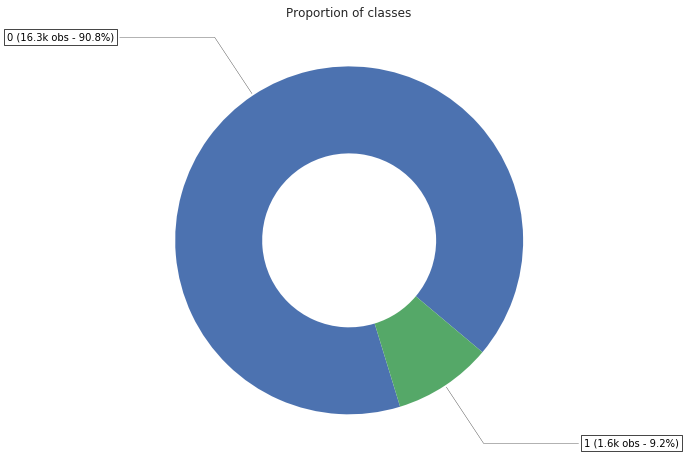

In [7]:
def donut_chart(data):
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

    recipe = [str(i) for i in list(data.value_counts().index)]

    info = data.value_counts()

    def pcts(val_list):
        pct = []
        for val in val_list:
            pct.append(" ({:.1f}k obs - {:.1f}%)".format(val/1000, 100*val/np.sum(val_list)))
        return pct

    recipe2 = pcts(info)

    wedges, texts = ax.pie(info, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        kw["color"] = 'k'
        ax.annotate(recipe[i]+recipe2[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)

    ax.set_title("Proportion of classes")
    plt.show()
    
donut_chart(data['pulsar'])

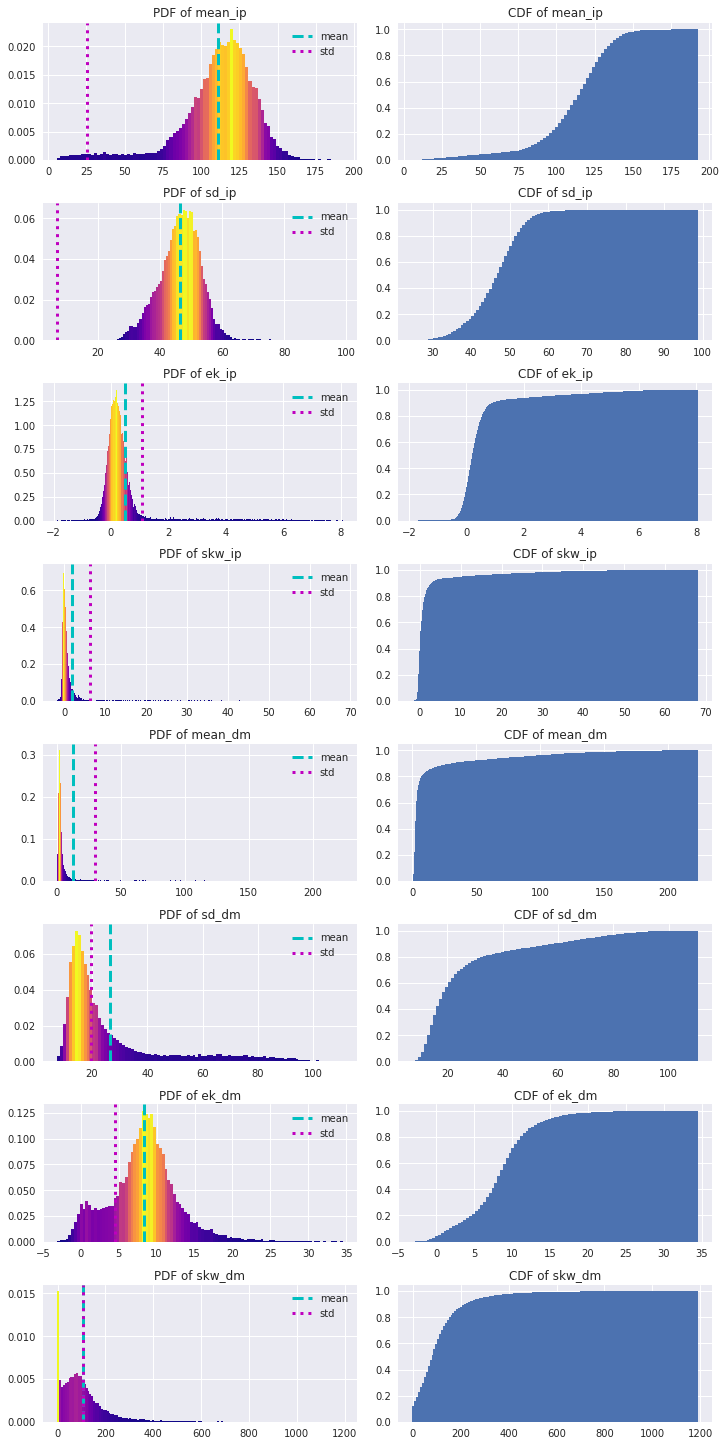

In [8]:
from matplotlib import colors

preds = [col for col in data.columns if col != "pulsar"]
num_preds = len(preds)
fig, axes = plt.subplots(num_preds, 2, figsize=(10,20))

for i, j in itertools.zip_longest(preds, range(num_preds)):
    N, bins, patches = axes[j, 0].hist(data[i], bins="auto", density=True)
    axes[j, 0].set_title(f"PDF of {i}")
    
    axes[j, 0].axvline(data[i].mean(), color = "c", linestyle="dashed", label="mean", linewidth=3)
    axes[j, 0].axvline(data[i].std(), color = "m", linestyle="dotted", label="std", linewidth=3)
    axes[j, 0].legend(("mean", "std"), loc="best")
    
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.plasma(norm(thisfrac))
        thispatch.set_facecolor(color)
    
    axes[j, 1].hist(data[i], bins="auto", cumulative=True, density=True)
    axes[j, 1].set_title(f"CDF of {i}")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

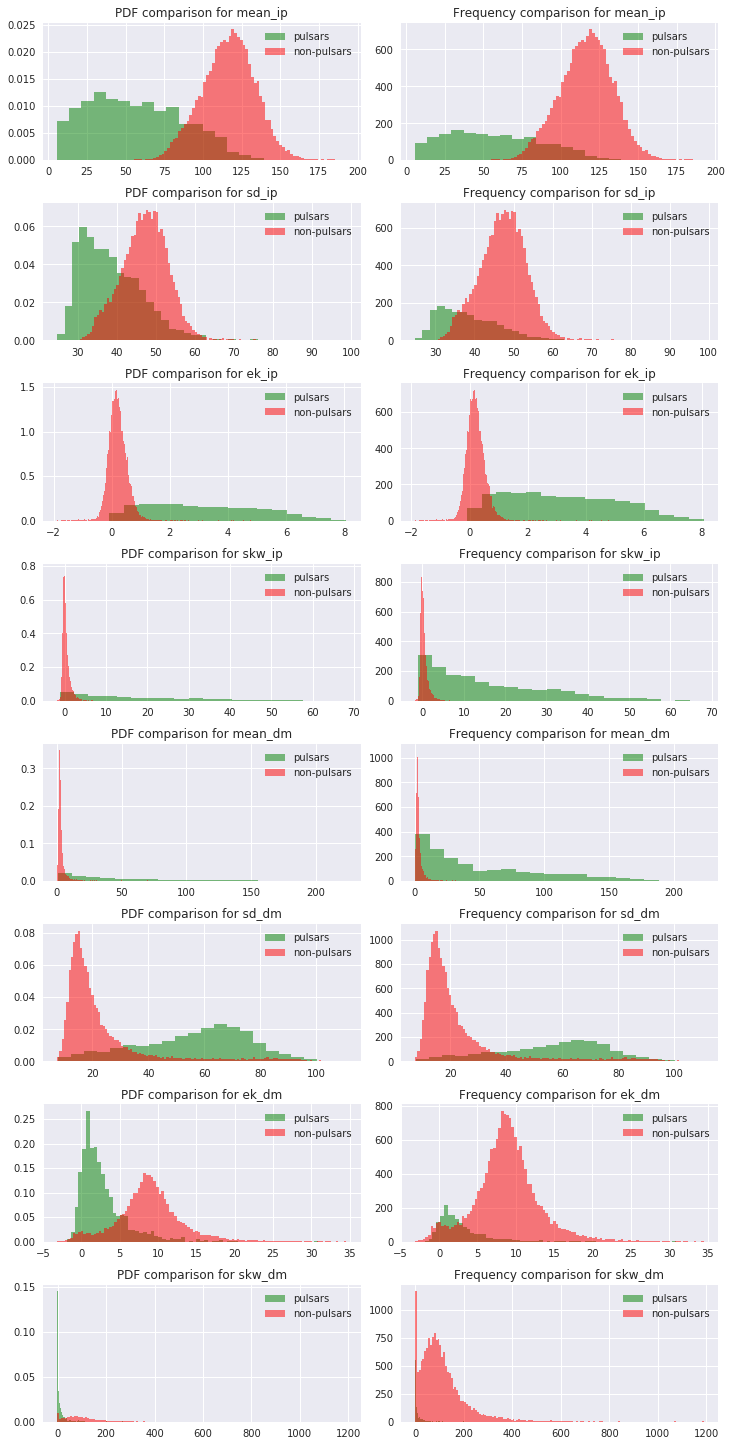

In [9]:
pulsars = data[data['pulsar'] == 1].drop('pulsar', axis=1)
non_pul = data[data['pulsar'] == 0].drop('pulsar', axis=1)

fig, axes = plt.subplots(num_preds, 2, figsize=(10,20))

for i, j in itertools.zip_longest(preds, range(num_preds)):
    axes[j, 0].hist(pulsars[i], bins="auto", label="pulsars", color = "g", alpha=0.5, density=True)
    axes[j, 0].hist(non_pul[i], bins="auto", label="non-pulsars", color = "r", alpha=0.5, density=True)
    axes[j, 0].set_title(f'PDF comparison for {i}')
    axes[j, 0].legend(loc="best")
    
    axes[j, 1].hist(pulsars[i], bins="auto", label="pulsars", color = "g", alpha=0.5)
    axes[j, 1].hist(non_pul[i], bins="auto", label="non-pulsars", color = "r", alpha=0.5)
    axes[j, 1].set_title(f'Frequency comparison for {i}')
    axes[j, 1].legend(loc="best")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

/home/andres-zarta/anaconda3/envs/tensor/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/andres-zarta/anaconda3/envs/tensor/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


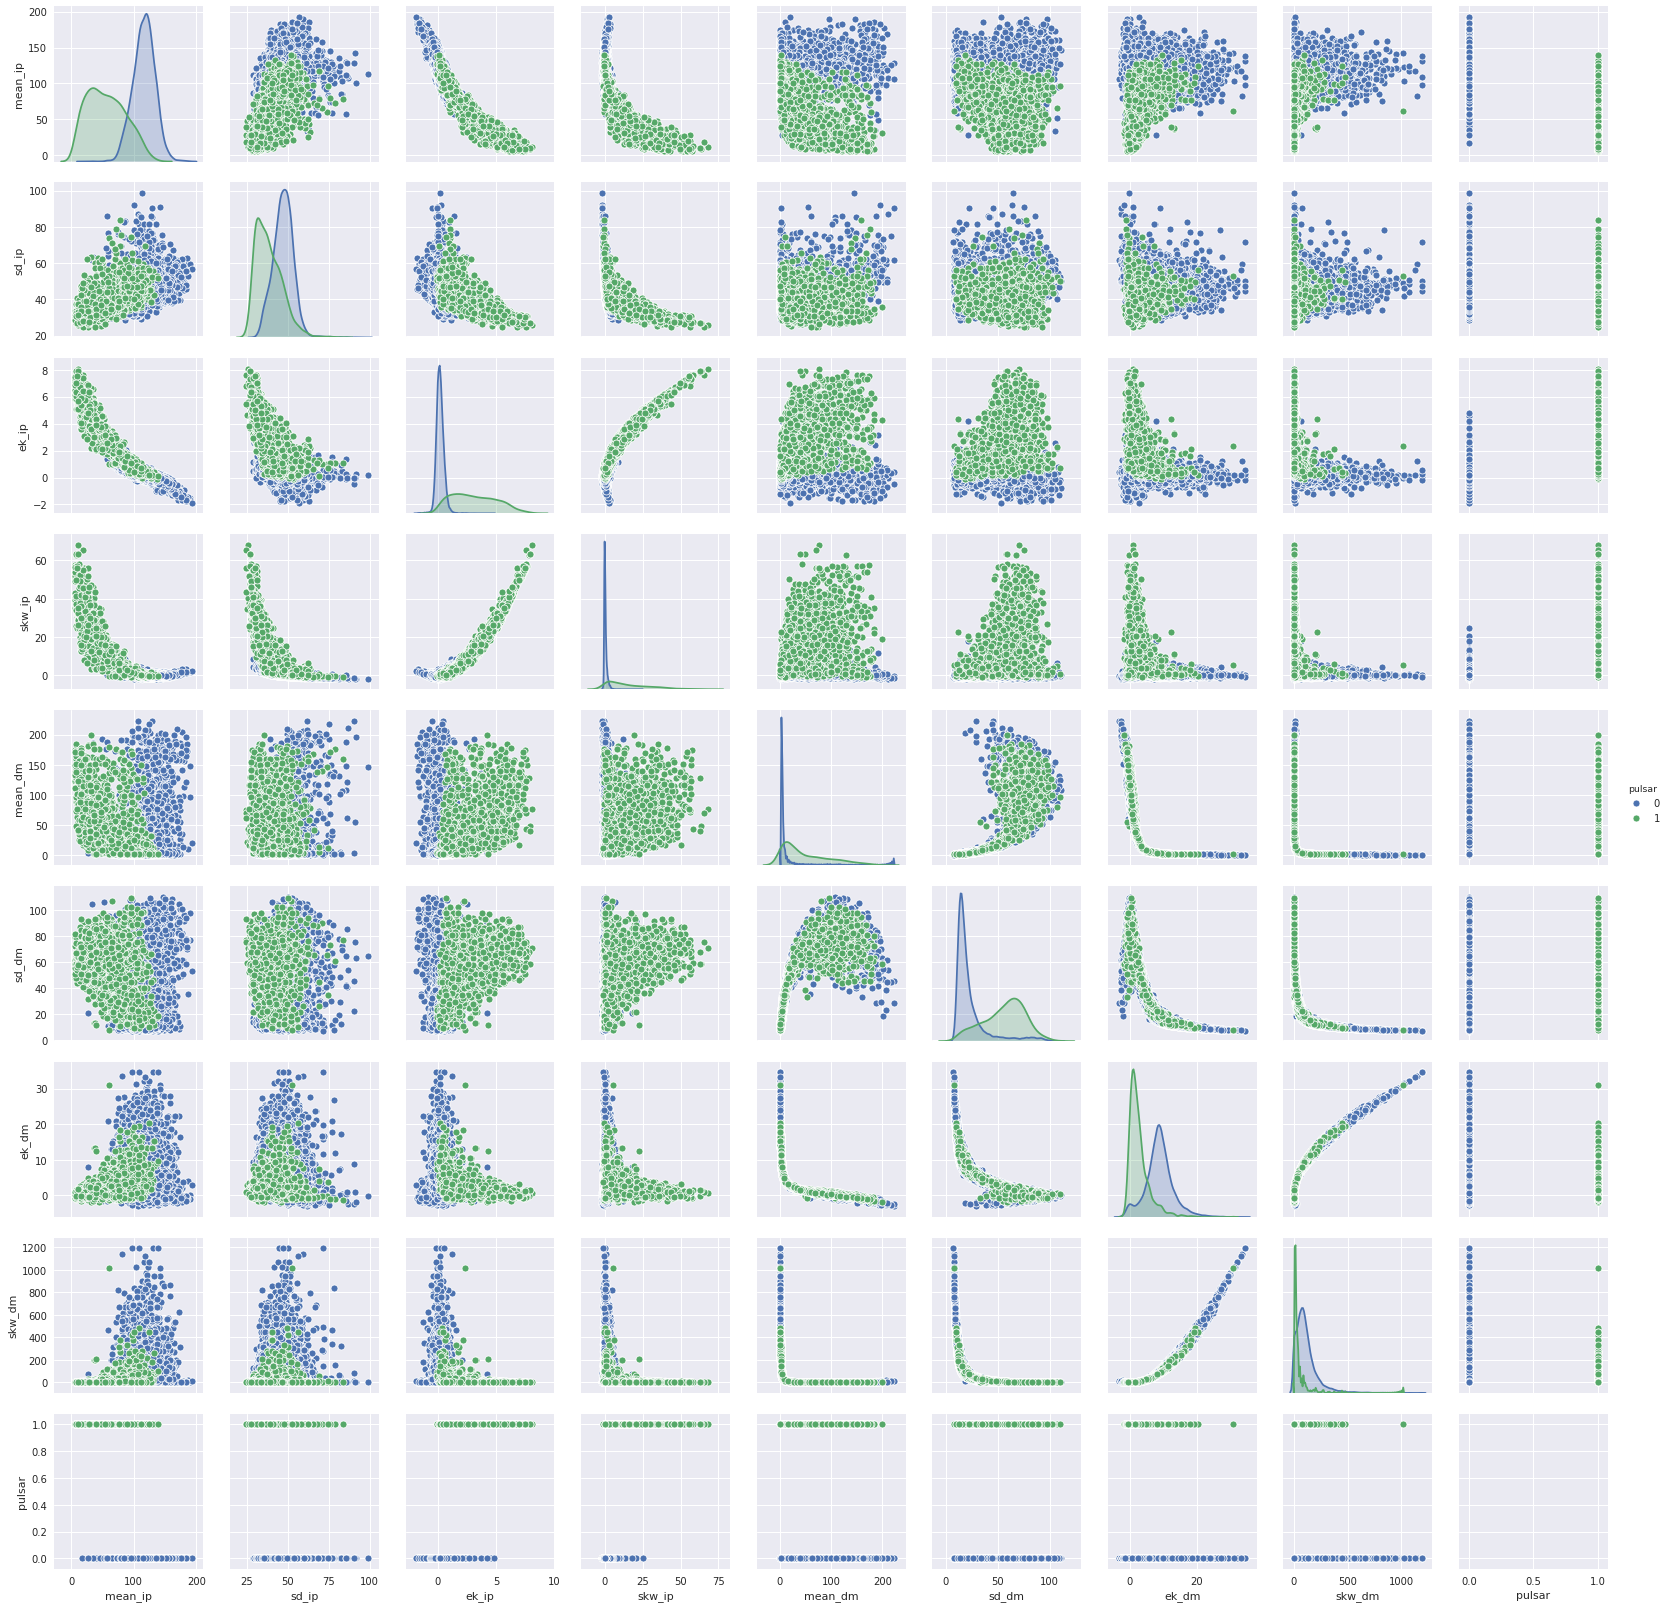

In [10]:
g = sns.pairplot(data,hue="pulsar")
plt.show()

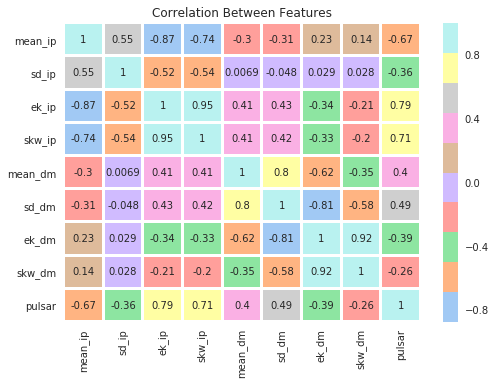

In [13]:
correlation = data.corr()
ax = sns.heatmap(correlation, annot=True, cmap=sns.color_palette("pastel"),
                 linewidth=2,edgecolor="k")
plt.title("Correlation Between Features")
plt.show()

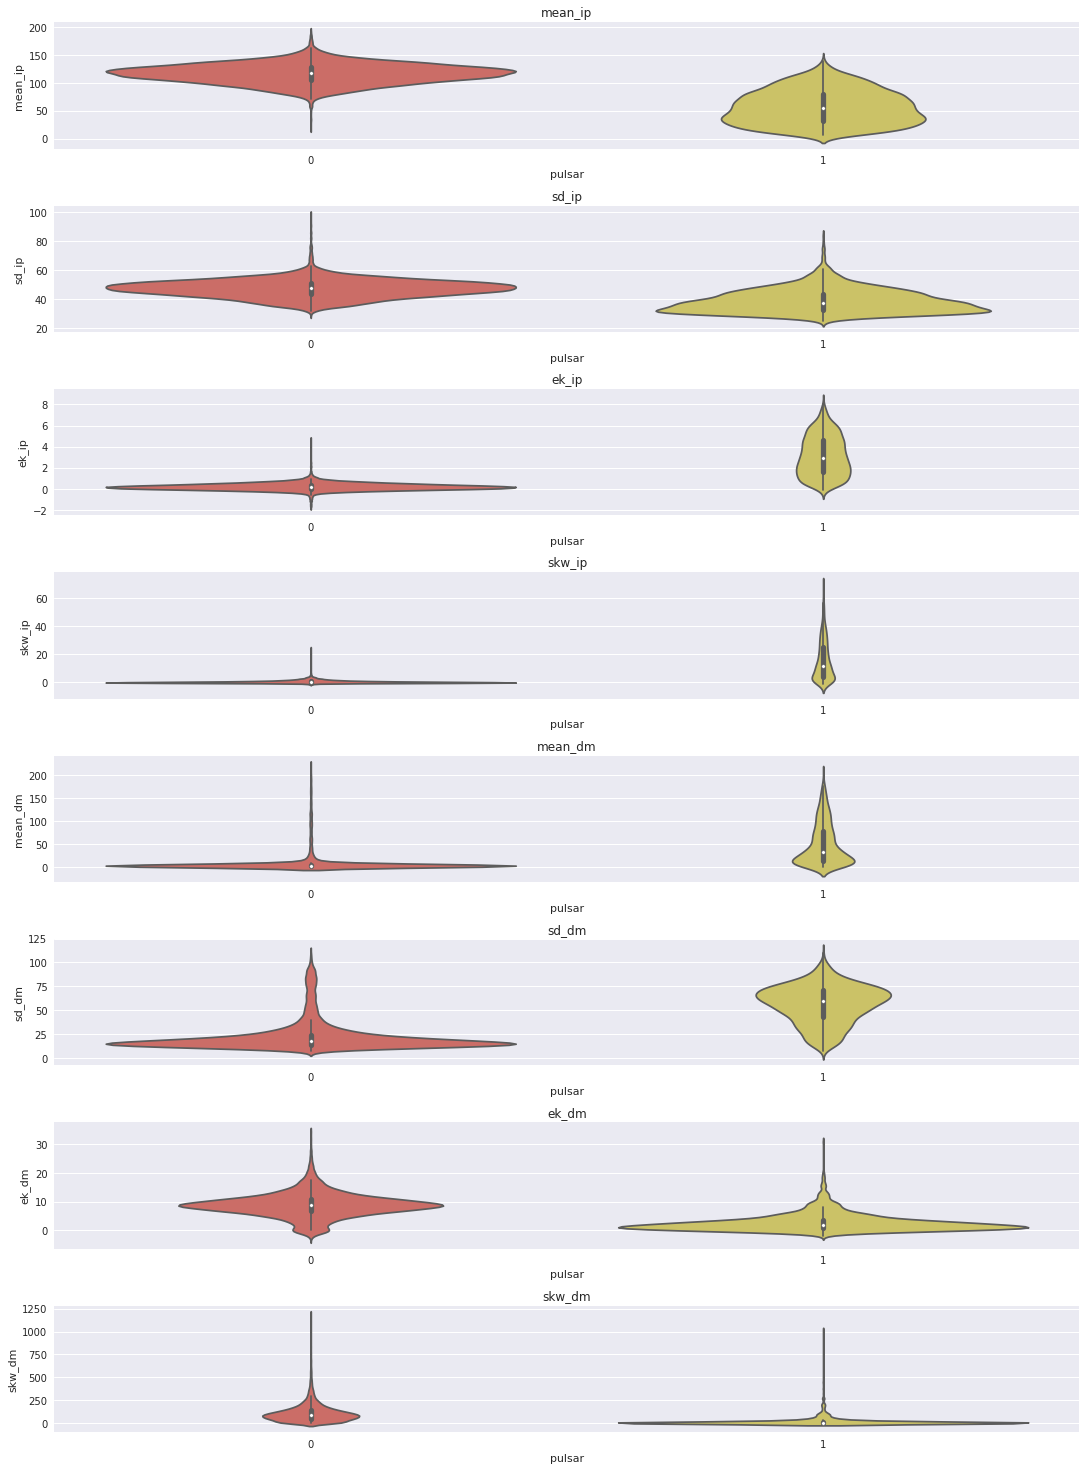

In [15]:
plt.figure(figsize=(15,25))

for i in range(num_preds):
    plt.subplot(10,1,i+1)
    sns.violinplot(x=data['pulsar'],y=data.iloc[:, i],
                   palette=sns.color_palette("hls", 7),alpha=.5)
    plt.title(data.columns[i])
    
plt.tight_layout()
plt.show()

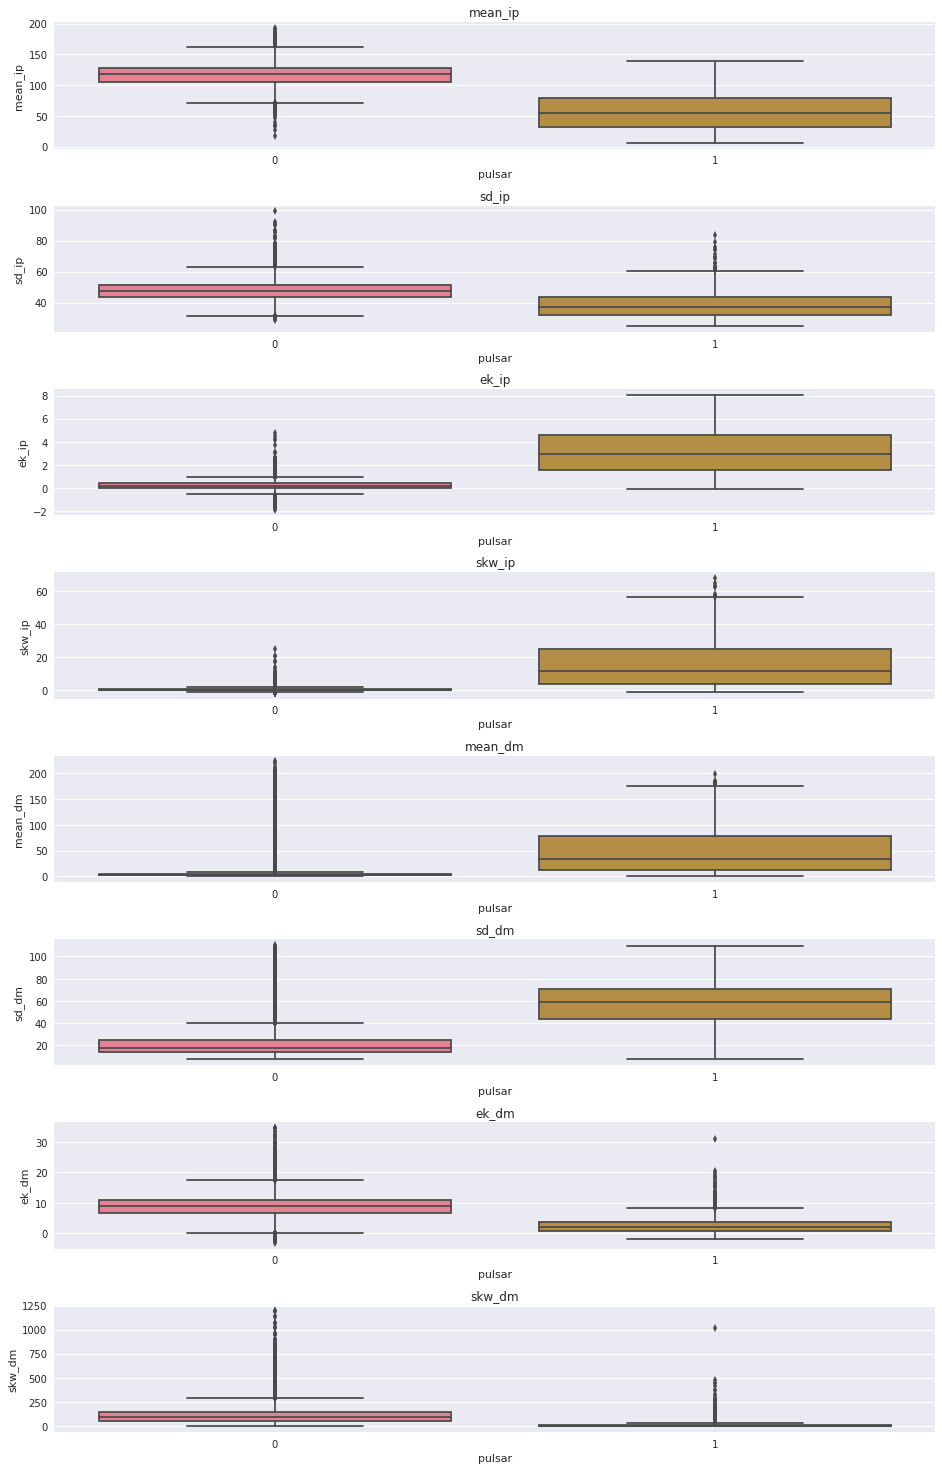

In [29]:
plt.figure(figsize=(13,25))

for i in range(num_preds):
    plt.subplot(10,1,i+1)
    sns.boxplot(data['pulsar'],y=data.iloc[:, i], 
                palette=sns.color_palette("husl", 7), color="w")
    plt.title(data.columns[i])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

# Outlier Analysis

Now we'll focus our attention in the outliers since they seem to be predominant across the dataset. We want to know what to do with them, should we drop or keep them?

First let's define a function that returns a tuple containing the interquantile range, the list of "left" outliers (values much smaller than the others in the distribution) and the list of "right" outliers (values much greater than the others) for a given pandas series:

In [30]:
def get_outliers(feature):
    data_out = data[feature]
    q1 = data_out.quantile(0.25)
    q3 = data_out.quantile(0.75)
    iqr = q3 - q1

    out_l = data_out[data_out < (q1 - 1.5*iqr)].index
    out_r = data_out[data_out > (q3 + 1.5*iqr)].index
    
    return(iqr, out_l, out_r)

Using the previous function, let's print the quantity and proportion of left and right outliers for each feature across the two classes:

In [31]:
def print_outlier_group():
    for i in preds:
        print(f'Predictor: {i}\n')

        iqr, out_l, out_r = get_outliers(i)

        full_count = pd.DataFrame()

        lower_count = data.iloc[out_l].groupby('pulsar').size().to_frame('lower_count')
        upper_count = data.iloc[out_r].groupby('pulsar').size().to_frame('upper_count')

        if not lower_count.empty:
            lower_count['lower_ratio'] = lower_count/lower_count.sum()
        else:
            lower_count['lower_ratio'] = np.nan
        if not upper_count.empty:
            upper_count['upper_ratio'] = upper_count/upper_count.sum()
        else:
            upper_count['upper_ratio'] = np.nan

        full_count = pd.concat([lower_count, upper_count], axis=1)
        print(full_count)
        print('\n======\n')

print_outlier_group()

Predictor: mean_ip

        lower_count  lower_ratio  upper_count  upper_ratio
pulsar                                                    
0                29     0.029683         53.0          1.0
1               948     0.970317          NaN          NaN


Predictor: sd_ip

        lower_count  lower_ratio  upper_count  upper_ratio
pulsar                                                    
0                 2     0.015625          123      0.91791
1               126     0.984375           11      0.08209


Predictor: ek_ip

        lower_count  lower_ratio  upper_count  upper_ratio
pulsar                                                    
0             113.0          1.0          126     0.084963
1               NaN          NaN         1357     0.915037


Predictor: skw_ip

        lower_count  lower_ratio  upper_count  upper_ratio
pulsar                                                    
0               NaN          NaN          589     0.309837
1               NaN          NaN  

In most of the cases there seems to be a correlation between the proportion of either left or right outliers and the class we are trying to predict. 

This seems to indicate that the outliers contain information about the class to which a celestial object belongs.

To dive even deeper into this, let's create a dataframe that for every observation contains the info of it being a left or right outlier for every feature, as well as the total count of features in which it is an outlier and the class it belongs to.

      mean_ip sd_ip ek_ip skw_ip mean_dm sd_dm ek_dm skw_dm  count  pulsar
8326        L  None     R      R       R     R     L   None      6       1
14620       L     L     R      R       R     R  None   None      6       1
11492       L     L     R      R       R     R  None   None      6       1
11493       L     L     R      R       R     R  None   None      6       1
1493        L     L     R      R       R     R  None   None      6       1
5700        L     L     R      R       R     R  None   None      6       1
5665        L     L     R      R       R     R  None   None      6       1
5661        L     L     R      R       R     R  None   None      6       1
5654        L     L     R      R       R     R  None   None      6       1
11527       L     L     R      R       R     R  None   None      6       1
11542       L     L     R      R       R     R  None   None      6       1
11554       L     L     R      R       R     R  None   None      6       1
5545        L     L     R

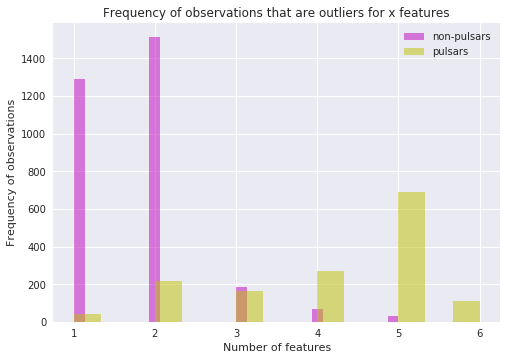

In [39]:
def update_outlier_dict(ou, out_list, label, i):
    for elem in list(out_list):
        if ou.get(elem) is None:
            ou.update({elem: dict.fromkeys(preds, None)})
        ou.get(elem).update({i: label})
        
def print_outliers_df():
    ou = {}
    for i in preds:
        iqr, out_l, out_r = get_outliers(i)
        
        update_outlier_dict(ou, out_l, "L", i)
        update_outlier_dict(ou, out_r, "R", i)

    df = pd.DataFrame.from_dict(ou, orient='index')
    df['count'] = df.count(axis=1)
    df['pulsar'] = data['pulsar'].iloc[df.index]
    #print(df.groupby('pulsar').size().to_frame('count_r'))
    print(df.sort_values('count', ascending=False))
    #print(df.groupby('count').size())
    plt.hist(df[df['pulsar']==0]['count'], bins='auto', color = "m", alpha=0.5)
    plt.hist(df[df['pulsar']==1]['count'], bins='auto', color = "y", alpha=0.5)
    plt.legend(labels=['non-pulsars', 'pulsars'])
    plt.title("Frequency of observations that are outliers for x features")
    plt.xlabel("Number of features")
    plt.ylabel("Frequency of observations")
    plt.show()

print_outliers_df()

We can see that in a general sense, the probability of an observation being a pulsar star increases with the number of features it is an outlier of. 

This relationship can be more complex than this but there is a correlation between being an outlier and belonging to a specific class. In this case outliers are not merely noise, but provide useful info for the classification procedure and **must not be removed**

# Dimension Reduction - PCA

In [16]:
from sklearn.preprocessing import RobustScaler

float_data = data.astype(np.float64)
robust_trans = RobustScaler().fit(float_data)
robust_data = pd.DataFrame(robust_trans.transform(data), 
                     columns= ['mean_ip', 'sd_ip', 'ec_ip', 
                               'sw_ip', 'mean_dm', 'sd_dm', 
                               'ec_dm', 'sw_dm', 'pulsar'])

robust_data.describe()

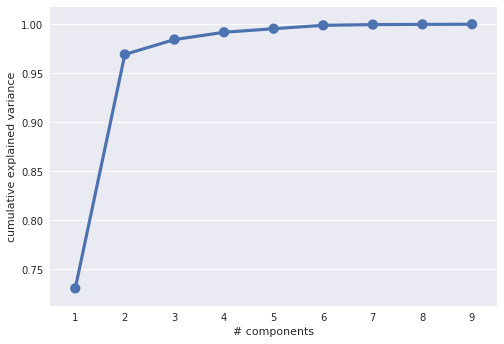

In [23]:
from sklearn.decomposition import PCA

pca_all = PCA()
pca_all.fit(robust_data)

cum_var = (np.cumsum(pca_all.explained_variance_ratio_))
n_comp = [i for i in range(1, pca_all.n_components_ + 1)]

ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='# components', ylabel='cumulative explained variance')
plt.show()

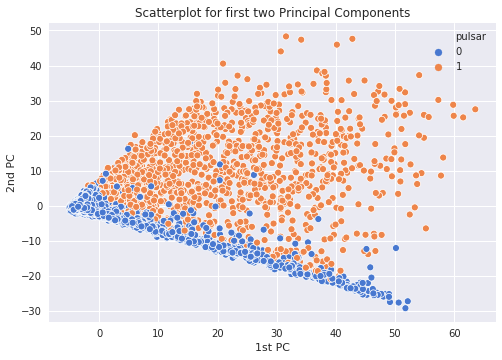

In [31]:
pca_2 = PCA(2)
pca_2.fit(robust_data)
data_2pc = pca_2.transform(robust_data)

ax = sns.scatterplot(x=data_2pc[:,0], 
                     y=data_2pc[:,1], 
                     hue=data['pulsar'],
                     palette=sns.color_palette("muted", n_colors=2))

ax.set(xlabel='1st PC', ylabel='2nd PC', title='Scatterplot for first two Principal Components')
plt.show()

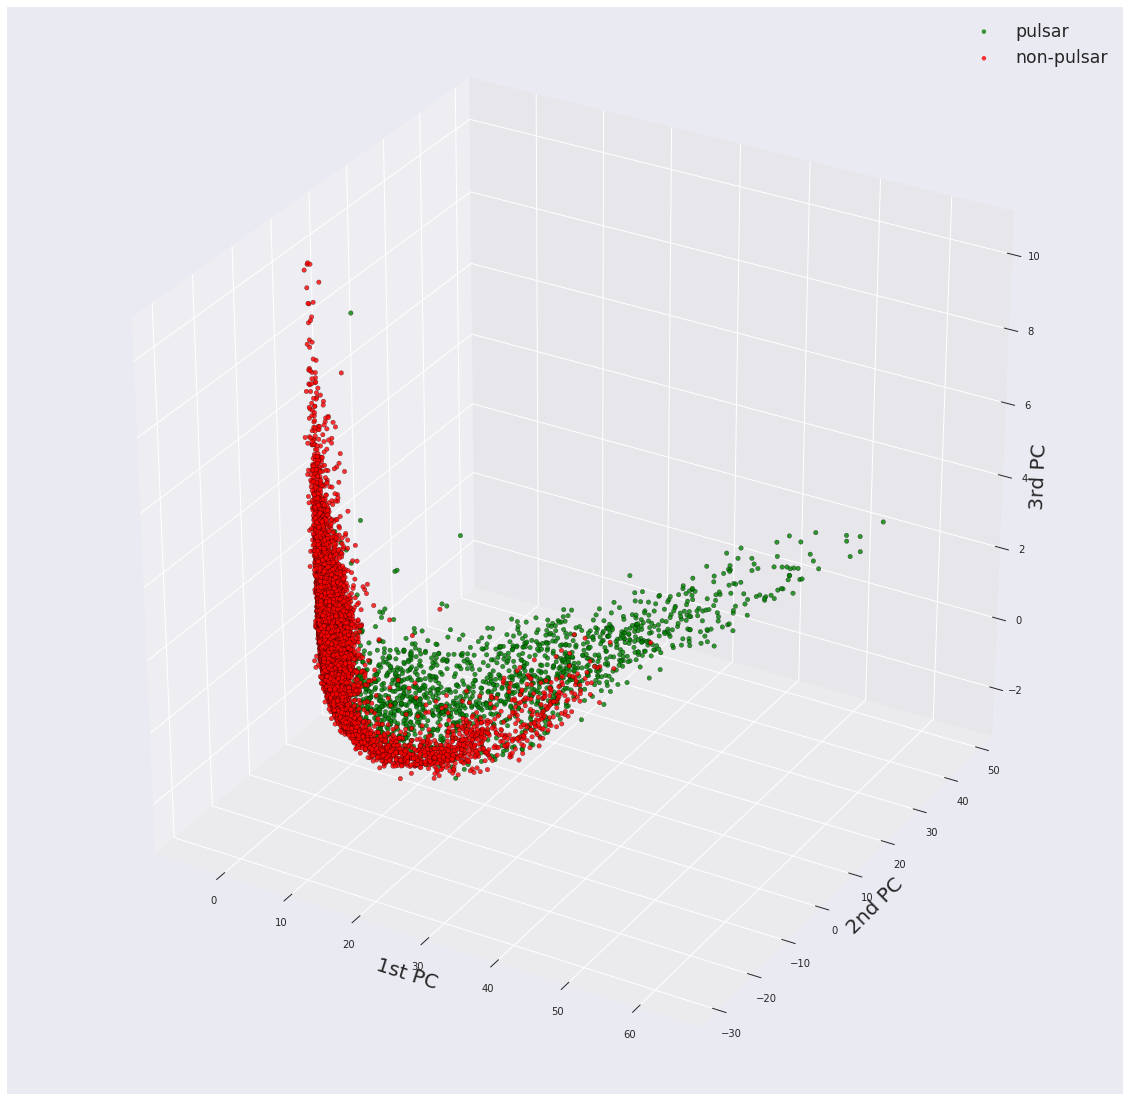

In [102]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(3)
pca_3.fit(robust_data)
data_3pc = pca_3.transform(robust_data)

pulsar_index = list(pulsars.index)
non_pulsar_index = list(non_pul.index)

x = data_3pc[:,0]
y = data_3pc[:,1]
z = data_3pc[:,2]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.take(x, pulsar_index), 
           np.take(y, pulsar_index), 
           np.take(z, pulsar_index),
           edgecolors='none', color='g',
           alpha=0.8, label='pulsar')


ax.scatter(np.take(x, non_pulsar_index), 
           np.take(y, non_pulsar_index), 
           np.take(z, non_pulsar_index),
           edgecolors='none', color='r',
           alpha=0.8, label='non-pulsar')

ax.set_xlabel("1st PC", fontsize=20)
ax.set_ylabel("2nd PC", fontsize=20)
ax.set_zlabel("3rd PC", fontsize=20)
ax.legend(fontsize="xx-large")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
X = data[preds]
y = data['pulsar']

sss = StratifiedShuffleSplit(test_size=0.33)
for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

#print(X_train)

In [ ]:
X = data[preds]
y = data['pulsar']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=420)



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn import metrics



logit = logit.fit(X_train, y_train)
y_pred_log = logit.predict(X_test)
scores = cross_val_score(logit, X, y,  scoring="balanced_accuracy", cv=5)
print("Accuracy: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

confusion_matrix_log = metrics.confusion_matrix(y_test,y_pred_log)
print(confusion_matrix_log)

auc_roc_log =metrics.roc_auc_score(y_test,y_pred_log)
print("auc score = {}".format(auc_roc_log))

bal_acc_log = metrics.balanced_accuracy_score(y_test, y_pred_log)
print("auc balanced_accuracy_score = {}".format(bal_acc_log))

for alfa in alphas:
    rge = RidgeClassifier(alpha=alfa, class_weight='balanced')
    rge = rge.fit(X_train, y_train)
    print(rge.get_params())
    y_pred_rge = rge.predict(X_test)
    #y_pred_rge = list(map(lambda x: 1 if x >= 0 else 0, y_pred_rge))

    confusion_matrix_rge = metrics.confusion_matrix(y_test,y_pred_rge)
    print(confusion_matrix_rge)

    auc_roc_rge =metrics.roc_auc_score(y_test,y_pred_rge)
    print("auc score = {}".format(auc_roc_rge))


fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr)

In [ ]:
from sklearn import linear_model

las = linear_model.Lasso(alpha=4)
las.fit(X_train, y_train)
y_pred_las = las.predict(X_test)

y_pred_las = list(map(lambda x: 1 if x >= 0.28 else 0, y_pred_las))

bal_acc_las = metrics.balanced_accuracy_score(y_test, y_pred_las)
print("auc balanced_accuracy_score = {}".format(bal_acc_las))

confusion_matrix_las = metrics.confusion_matrix(y_test,y_pred_las)
print(confusion_matrix_rge)


In [13]:
dcbdy = np.linspace(0.4, 0.7, 20)
dcbdy

array([0.4       , 0.41578947, 0.43157895, 0.44736842, 0.46315789,
       0.47894737, 0.49473684, 0.51052632, 0.52631579, 0.54210526,
       0.55789474, 0.57368421, 0.58947368, 0.60526316, 0.62105263,
       0.63684211, 0.65263158, 0.66842105, 0.68421053, 0.7       ])

In [ ]:
plt.hist(y_pred_las, bins='auto')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

pca = PCA(n_components=2)
pca.fit(X_train)

pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, y_train)

In [ ]:
X_train = pls2.transform(X_train)
X_test = pls2.transform(X_test)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, log_loss, roc_curve

def build_test_model(model, xtr, ytr, xte, yte):
    model.fit(xtr, ytr)
    predictions = model.predict(xte)
    model_name = type(model).__name__
    params = model.get_params()
    print('==========================================')
    print(f'Model output for {model_name}\n')
    print(f'Parameters used: {params}\n')

    conf_m = confusion_matrix(yte, predictions)
    print(f'Confusion Matrix : \n{conf_m}\n')

    bal_acc = balanced_accuracy_score(yte, predictions)
    print(f'Balanced Accuracy Score = {bal_acc}')
    print('==========================================')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer 

def get_sss_data(XX, yy):
    sss = StratifiedShuffleSplit(test_size=0.33)
    for train_index, test_index in sss.split(XX, yy):
            X_tr, X_te = X.iloc[train_index], X.iloc[test_index]
            y_tr, y_te = y[train_index], y[test_index]
    return (X_tr, y_tr, X_te, y_te)


data_dummy = data.copy(deep=True)
X_d = data_dummy[preds]
y_d = data_dummy['pulsar']

X_train_d, y_train_d, X_test_d, y_test_d = get_sss_data(RobustScaler().fit_transform(X_d), y_d)

#RobustScaler().fit_transform(X_d)
#StandardScaler().fit_transform(X_d)



logit = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
build_test_model(logit, X_train_d, y_train_d, X_test_d, y_test_d)

logit2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', max_iter=1000)
build_test_model(logit2, X_train_d, y_train_d, X_test_d, y_test_d)

In [ ]:
RobustScaler().fit_transform(X_d)

In [6]:
from sklearn.linear_model import LogisticRegression
classifiers = [
    #RandomForestClassifier(class_weight='balanced', n_estimators=20 , random_state=42),
    LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', max_iter=1000)
]

for c in classifiers:
    build_test_model(c, X_train, y_train, X_test, y_test)

NameError: name 'build_test_model' is not defined

In [11]:
logit = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
logit.fit(X_train, y_train)
predictions = logit.predict_proba(X_test)


In [ ]:
predictions[:,1]

In [21]:
scs = []
fps = []
fns = []
for dc in dcbdy:
    print('=================================')
    print(f'threshold set to: {dc}')
    
    pred_temp = predictions[:,1]
    pred_prob = list(map(lambda x: 1 if x >= dc else 0, pred_temp))
    conf_m = confusion_matrix(y_test, pred_prob)
    print(f'Confusion Matrix : \n{conf_m}\n')

    #bal_acc = balanced_accuracy_score(y_test, pred_prob)
    #print(f'Balanced Accuracy Score = {bal_acc}')
    print('==========================================')
    #scs.append(bal_acc)
    fps.append(conf_m[0,1])
    fns.append(conf_m[1,0])

threshold set to: 0.4
Confusion Matrix : 
[[5138  228]
 [  40  501]]

threshold set to: 0.41578947368421054
Confusion Matrix : 
[[5152  214]
 [  41  500]]

threshold set to: 0.43157894736842106
Confusion Matrix : 
[[5158  208]
 [  42  499]]

threshold set to: 0.4473684210526316
Confusion Matrix : 
[[5168  198]
 [  42  499]]

threshold set to: 0.4631578947368421
Confusion Matrix : 
[[5184  182]
 [  44  497]]

threshold set to: 0.4789473684210526
Confusion Matrix : 
[[5192  174]
 [  45  496]]

threshold set to: 0.49473684210526314
Confusion Matrix : 
[[5205  161]
 [  47  494]]

threshold set to: 0.5105263157894737
Confusion Matrix : 
[[5213  153]
 [  48  493]]

threshold set to: 0.5263157894736842
Confusion Matrix : 
[[5222  144]
 [  49  492]]

threshold set to: 0.5421052631578948
Confusion Matrix : 
[[5236  130]
 [  50  491]]

threshold set to: 0.5578947368421052
Confusion Matrix : 
[[5240  126]
 [  50  491]]

threshold set to: 0.5736842105263158
Confusion Matrix : 
[[5247  119]
 [  51 

In [ ]:
dcbdy = np.linspace(0.4, 1, 200)
dcbdy

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(dcbdy, scs)
ax1.legend(['accuracy'])
ax2 = ax1.twinx()
ax2.plot(dcbdy, fps)
ax2.plot(dcbdy, fns)
ax2.legend(['false positives', 'false negatives'])
plt.show()

In [1]:
data

NameError: name 'data' is not defined